<a href="https://colab.research.google.com/github/dohaadel/Data-Mining/blob/main/speech%20signal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from scipy.io import wavfile
from IPython.display import Audio
from matplotlib import pyplot as plt
import numpy as np


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


44100


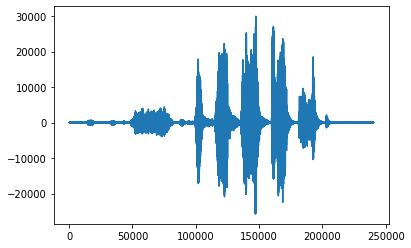

In [ ]:
f_name ="/content/drive/My Drive/code/mixkit-laughing-teenager-428.wav"
fs,wav = wavfile.read(f_name )
print(fs)
wav2=wav.flatten()
plt.plot(wav2)

In [ ]:
Audio(f_name,autoplay=True)

NameError: ignored

In [ ]:
def framing(sig, fs=fs, win_len=0.025, win_hop=0.01):
     
     # compute frame length and frame step (convert from seconds to samples)
     frame_length = win_len * fs
     frame_step = win_hop * fs
     signal_length = len(sig)
     frames_overlap = frame_length - frame_step

     # Make sure that we have at least 1 frame+
     num_frames = np.abs(signal_length - frames_overlap) // np.abs(frame_length - frames_overlap)
     rest_samples = np.abs(signal_length - frames_overlap) % np.abs(frame_length - frames_overlap)

     # Pad Signal to make sure that all frames have equal number of samples
     # without truncating any samples from the original signal
     if rest_samples != 0:
         pad_signal_length = int(frame_step - rest_samples)
         z = np.zeros((pad_signal_length))
         pad_signal = np.append(sig, z)
         num_frames += 1
     else:
         pad_signal = sig

     # make sure to use integers as indices
     frame_length = int(frame_length)
     frame_step = int(frame_step)
     num_frames = int(num_frames)

     # compute indices
     idx1 = np.tile(np.arange(0, frame_length), (num_frames, 1))
     idx2 = np.tile(np.arange(0, num_frames * frame_step, frame_step),
                    (frame_length, 1)).T
     indices = idx1 + idx2
     frames = pad_signal[indices.astype(np.int32, copy=False)]
     return frames

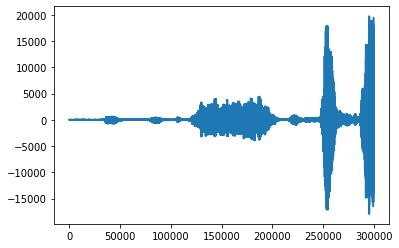

In [ ]:
frame = framing(wav, fs, 0.025,0.01)
NewFrame= frame.flatten()
plt.plot(NewFrame)